In [1]:
# -*- coding: utf-8 -*-

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using TensorFlow backend.
W0712 18:07:12.028772 139874063685504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 18:07:12.050200 139874063685504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 18:07:12.053676 139874063685504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 18:07:12.093012 139874063685504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 18:07:12.096420 1398740

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


W0712 18:07:12.259479 139874063685504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 18:07:12.271859 139874063685504 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 18:07:12.886154 139874063685504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 27s 534us/step - loss: 1.7826 - acc: 0.3514 - val_loss: 1.5115 - val_acc: 0.4594
Epoch 2/20
50000/50000 [==============================] - 24s 479us/step - loss: 1.4873 - acc: 0.4622 - val_loss: 1.3236 - val_acc: 0.5258
Epoch 3/20
50000/50000 [==============================] - 24s 479us/step - loss: 1.3336 - acc: 0.5207 - val_loss: 1.2094 - val_acc: 0.5699
Epoch 4/20
50000/50000 [==============================] - 24s 474us/step - loss: 1.2258 - acc: 0.5668 - val_loss: 1.1565 - val_acc: 0.5879
Epoch 5/20
50000/50000 [==============================] - 24s 487us/step - loss: 1.1450 - acc: 0.5947 - val_loss: 1.0742 - val_acc: 0.6221
Epoch 6/20
50000/50000 [==============================] - 24s 475us/step - loss: 1.0746 - acc: 0.6222 - val_loss: 1.0112 - val_acc: 0.6457
Epoch 7/20
50000/50000 [==============================] - 23s 467us/step - loss: 1.0132

dense neural network

In [0]:
def dense_nn (hidden):
  batch_size = 32
  num_classes = 10
  epochs = 20
  data_augmentation = False
  num_predictions = 20
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  model_name = 'keras_cifar10_trained_model_dense_'+str(hidden)+'.h5'

  # The data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  x_train = x_train.reshape((x_train.shape[0], -1))
  x_test = x_test.reshape((x_test.shape[0], -1))
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)

  model = Sequential()

  for i in range(hidden):
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
 
  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)


  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255

  if not data_augmentation:
      print('Not using data augmentation.')
      model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for feature-wise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      model.fit_generator(datagen.flow(x_train, y_train,
                                       batch_size=batch_size),
                          steps_per_epoch=1563,
                          epochs=epochs,
                          validation_data=(x_test, y_test),
                          workers=4)

  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  return model.history.history

In [0]:
model_dense_lst = [dense_nn(x) for x in range(5)]

x_train shape: (50000, 3072)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 132us/step - loss: 1.9769 - acc: 0.2947 - val_loss: 1.8989 - val_acc: 0.3247
Epoch 2/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.8488 - acc: 0.3519 - val_loss: 1.8274 - val_acc: 0.3600
Epoch 3/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.8130 - acc: 0.3702 - val_loss: 1.8223 - val_acc: 0.3620
Epoch 4/20
50000/50000 [==============================] - 6s 124us/step - loss: 1.7938 - acc: 0.3788 - val_loss: 1.7908 - val_acc: 0.3768
Epoch 5/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.7791 - acc: 0.3829 - val_loss: 1.7904 - val_acc: 0.3878
Epoch 6/20
50000/50000 [==============================] - 6s 125us/step - loss: 1.7687 - acc: 0.3892 - val_loss: 1.7812 - val_acc: 0.3781
Epoch 7/20
50000/50000 [=

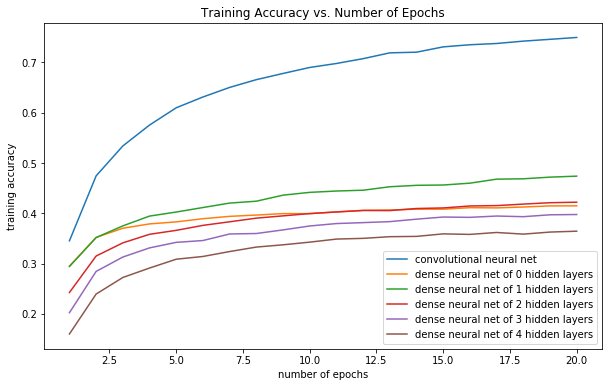

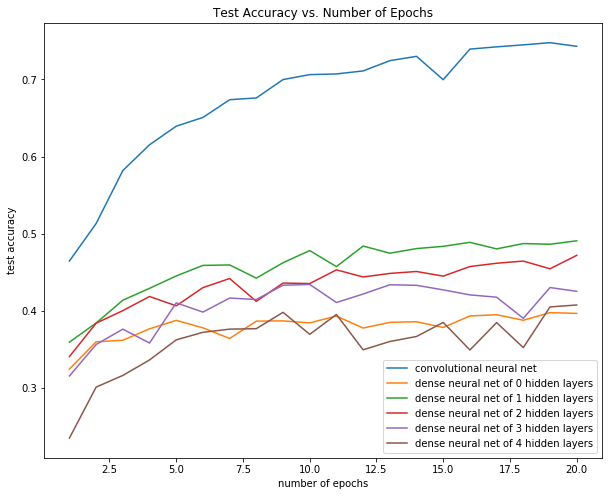

In [0]:
import matplotlib.pyplot as plt

hist_cnn = model.history.history

x_range = range(1, epochs+1)
plt.figure(figsize=(10,6))
plt.plot(x_range, hist_cnn['acc'], label='convolutional neural net')
for i in range(5):
  plt.plot(x_range, model_dense_lst[i]['acc'], label='dense neural net of '+str(i)+' hidden layers')
plt.xlabel('number of epochs')
plt.ylabel('training accuracy')
plt.title('Training Accuracy vs. Number of Epochs')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10,8))
plt.plot(x_range, hist_cnn['val_acc'], label='convolutional neural net')
for i in range(5):
  plt.plot(x_range, model_dense_lst[i]['val_acc'], label='dense neural net of '+str(i)+' hidden layers')
plt.xlabel('number of epochs')
plt.ylabel('test accuracy')
plt.title('Test Accuracy vs. Number of Epochs')
plt.legend(loc='lower right')
plt.show()